# Using VO services

OpenKM3 uses the [pyvo interface](https://pyvo.readthedocs.io) to access data provided through the [VO server](http://vo.km3net.de) of KM3NeT. Currently implemented is a Simple Cone Search (SCS) service accessible through the TAP protocol.

In [1]:
from openkm3.store import KM3Store
store = KM3Store()

INFO:root:Loaded catalog from cache.


In [2]:
service = store.get("ana20_01_vo")

INFO:root:Loaded entry ana20_01_vo as <class 'openkm3.dataclasses.SCSServiceVO'>.


In [3]:
service.show_paraminfo()

Table: ant20_01.main
Neutrino candidates from full-sky search from 2007-2017

name                 description                 unit       ucd       utype arraysize datatype
---- ------------------------------------------- ---- --------------- ----- --------- --------
  _r                     Distance to cone center  deg    pos.distance  None         1     None
 MJD                         Modified Julian Day None      time.epoch  None         1     None
Beta    angular error estimate on reconstruction None      stat.error  None         1     None
Nhit number of light signals in photomultipliers None     phys.energy  None         1     None
  RA              FK5 equatorial right ascension None  POS_EQ_RA_MAIN  None         1     None
Decl                  FK5 equatorial declination None POS_EQ_DEC_MAIN  None         1     None
  ID                            Event identifier None         ID_MAIN  None         *     None


## Getting TAP service or SCS

You can get the services from the loaded KM3Object, which returns pyvo objects. From here onwards, you can use pyvo functions.

In [4]:
tap = service.get_tap()
highEevents = tap.search("SELECT * FROM ant20_01.main WHERE nhit>150") # get most high-energetic events
highEevents.to_table()

mjd,beta,nhit,ra,decl,id
float64,float64,int32,float64,float64,object
54789.2282,0.1,263,315.0,-16.7,ANT1157
55970.095,0.3,160,18.6,-43.3,ANT4737
56660.329,0.9,200,10.8,-1.5,ANT6138
56221.4919,0.3,158,39.6,11.0,ANT5198
56329.4015,0.2,157,156.7,3.6,ANT5571
54725.8894,0.2,152,200.4,17.9,ANT0886
56574.7303,0.3,153,105.2,-44.3,ANT5888
54731.2417,0.1,155,281.1,-48.7,ANT0907
56412.889,0.2,156,283.4,-57.1,ANT5655


In [5]:
scs = service.get_scs()
coneevents = scs.search((20,30), 2) # get events for a 2 degree cone around given sky coordinates
coneevents.to_table()

_r,MJD,Beta,Nhit,RA,Decl,ID
deg,,,,,,
float64,float64,float64,int32,float64,float64,object
0.327663931770686,56195.5948,0.4,45,20.3,30.2,ANT5087
1.56948430621669,55692.7303,0.3,62,18.7,31.1,ANT3659


## Access full table

In [6]:
fulltable = service.get_dataframe()

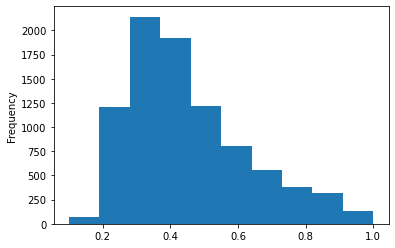

In [7]:
plot = fulltable.beta.plot(kind = "hist")